In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

x_task1 = np.random.rand(1000, 10)
x_task2 = np.random.rand(1000, 10)  
y_task1 = np.random.rand(1000, 1) 
y_task2 = np.random.rand(1000, 1) 
 
input_layer = Input(shape=(10,))

branch_task1 = Dense(64, activation='relu')(input_layer)
output_task1 = Dense(1, name='output_task1')(branch_task1)

branch_task2 = Dense(64, activation='relu')(input_layer)
output_task2 = Dense(1, name='output_task2')(branch_task2)

model_task1 = Model(inputs=input_layer, outputs=output_task1)
model_task2 = Model(inputs=input_layer, outputs=output_task2)

model_task1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_task2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

multitask_model = Model(inputs=input_layer, outputs=[output_task1, output_task2])

multitask_model.compile(optimizer='adam',
                        loss={'output_task1': 'mean_squared_error',
                              'output_task2': 'mean_squared_error'},
                        loss_weights={'output_task1': 0.5, 'output_task2': 0.5},
                        metrics={'output_task1': 'mae', 'output_task2': 'mae'})

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = multitask_model.fit(x_task1, [y_task1, y_task2], validation_split=0.2, epochs=50, callbacks=[early_stopping])

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3792 - output_task1_mae: 0.6949 - output_task2_mae: 0.3142 - val_loss: 0.1023 - val_output_task1_mae: 0.2509 - val_output_task2_mae: 0.2786
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0970 - output_task1_mae: 0.2640 - output_task2_mae: 0.2654 - val_loss: 0.0915 - val_output_task1_mae: 0.2540 - val_output_task2_mae: 0.2557
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0919 - output_task1_mae: 0.2738 - output_task2_mae: 0.2462 - val_loss: 0.0875 - val_output_task1_mae: 0.2418 - val_output_task2_mae: 0.2563
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0841 - output_task1_mae: 0.2490 - output_task2_mae: 0.2454 - val_loss: 0.0858 - val_output_task1_mae: 0.2412 - val_output_task2_mae: 0.2546
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0828 - output_task1_mae: 0.2461 - output_task2_mae: 0.2461 - val_loss: 0.0854 - val_output_task1_mae: 0.2396 - val_output_task2_mae: 0.2552


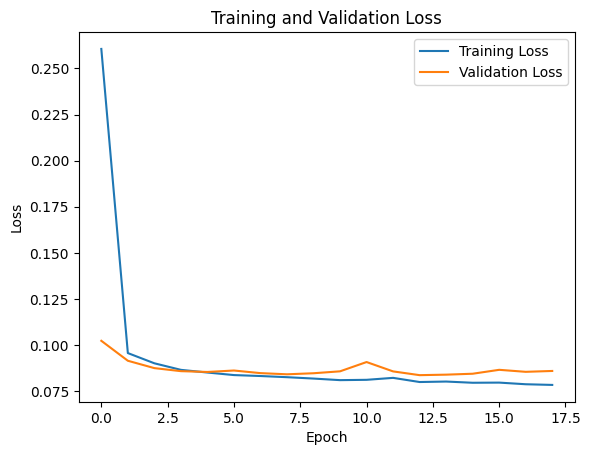

In [3]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

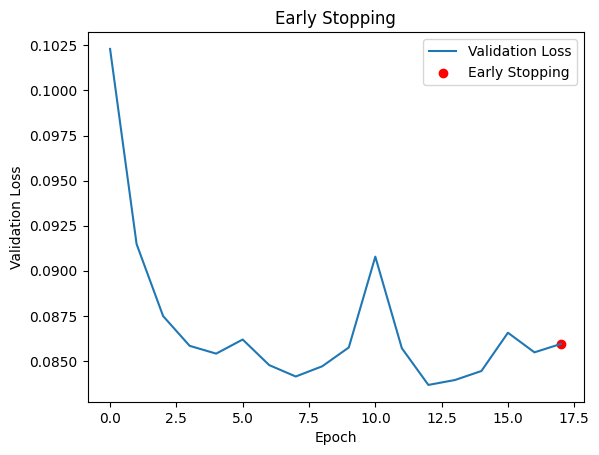

In [4]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.scatter(early_stopping.stopped_epoch, history.history['val_loss'][early_stopping.stopped_epoch], color='red', label='Early Stopping')
plt.title('Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()